In [1]:
#all imports for project 
from pathlib import Path 
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

import modeling as m
import explore as e
import wrangle as w

import warnings
warnings.filterwarnings("ignore")


np.random.seed(100)


In [2]:
# get data
df = w.get_clean_data()

## Target variable - Operating Margin
How much profit company makes on a dollar of sales after paying variable costs but before paying interest or tax.

## Data Dictionary 

| Feature | Definition |
|:--------|:-----------|
|Retailer| Specific store: Amazon, Foot Locker, Kohl's, Sports Direct, Walmart, West Gear|
|Region| Geographic Region in United States: Northeast, Midwest South, Southeast, West |
|Product| Products sold by retailer: men and women's footwear and apparel|
|Operating Margin| operating income/revenue|
|Sales Method | The method of sale: In Store, Online and Outlet |

In [3]:
# split data for exploration 
train,validate,test= w.split_data(df)

## What are the median and mean Operating Margins? 

In [4]:
#Table of median and mean
e.table(train)

Metric         Value
----------  --------
Median      0.41
Mean        0.423395
Difference  0.013395


## Takeaways 
- Median and mean are not too far apart 
- For performance evaluation, significantly exceeding .423 is exceptional 



## Does region have a relationship with operating margin? 

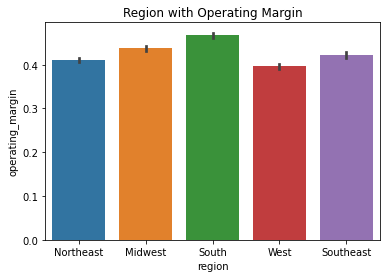

In [5]:
# barplot visual
e.barplot(train,"region","operating_margin","Region with Operating Margin")

## Hypothesis

Ho: There is not a significant difference in the operating margin mean across Regions.<br>
Ha: Is there a significant difference in the operating margin mean across the Regions.

In [6]:
#create region dataframes for statistical testing 
n_east,midwest,south,west,s_east = w.region_data_frames(train)

In [7]:
# statistical test evaluation
e.anova_test(n_east,midwest,south,west,s_east)

Kruska Result = 309.2166
p = 1.113012461973387e-65


##  Takeaways 

- South region has the highest operating margin 
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- Business takeaway, south region may be best region to continue to expand in


## come backs 
- place values on the bar charts 
- figure out how to better present region names next to variances 

## Is there a relationship between operating margin and Retailers? 

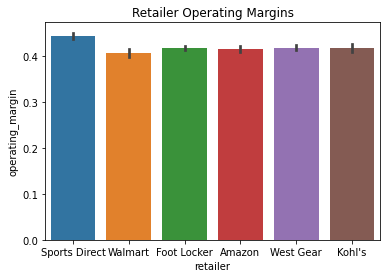

In [8]:
# barplot visual
e.barplot(train,"retailer", "operating_margin","Retailer Operating Margins")


## Hypothesis

Ho: There is not a significant difference in the mean operating margin across Retailers.<br>
Ha: Is there a significant difference in the operating margin mean across Retailers.

In [9]:
#creating retail dataframes for statistical test 
sports_direct,walmart,foot_locker,amazon,west_gear,kohls = w.retailer_data_frames(train)

In [10]:
# statistical test results 
e.anova_test_six(sports_direct,walmart,foot_locker,amazon,west_gear,kohls)

Kruska Result = 48.8301
p = 2.403965243243204e-09


## Takeaways 
- The retailer with the highest operating margin is sports_direct
- The remaining retailers have a similar operating margin 
- Walmart appears to be underperforming relative to its peers 
- retailer is a feature that should be considered for modeling 



## Is there a relationship between operating margin and sales method?

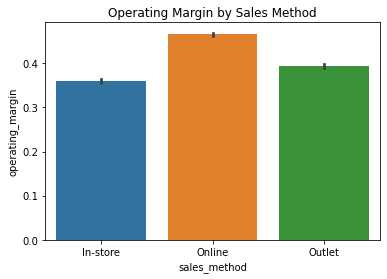

In [11]:
# barplot visual
e.barplot(train,"sales_method", "operating_margin","Operating Margin by Sales Method")

## Hypothesis
    
Ho: There is not a significant difference in the mean operating margin across sales methods.<br>
Ha: There is a significant difference in the mean operating margin across sales methods.

In [12]:
#statistical test results 
e.anova_test_sales(train)

Kruska Result = 1168.4619
p = 1.8695019652572764e-254


## Takeaways 
- Online Sales appears to have the highest operating margin 
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 

## Is there a significant difference in the mean operating margin across products?

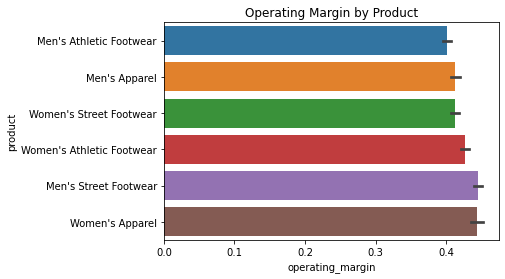

In [13]:
# barplot visual
e.barplot(train,"operating_margin","product","Operating Margin by Product")

## Hypothesis

Ho: There is not a significant difference in the operating margin mean across products.<br>
Ha: Is there a significant difference in the operating margin mean across the products

In [14]:
#statistical test results 
e.anova_test_products(train)

Kruska Result = 167.5372
p = 2.4462474817537047e-34


## Takeaways 
- there is a relationship between product and operating margin 
- Apparel will be considered for modeling 
- Women's apparel and men's street footwear appear to have the highest profit margins


## Exploration Summary

- The median operating margin is 41%
- The mean property value is 42.3%
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- retailer is a feature that should be considered for modeling 
- The retailer with the highest operating margin is sports_direct
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 
- there is a relationship between product and operating margin 
- Product will be considered for modeling 


## Modeling

### Introduction

- I will use Root Mean Squared error as my evaluation metric
- My baseline model is created from the Root Mean Squared error (RMSE) of the median operating margin
- The best combination of features for modeling were each region, each sales method,  each retailer and each product
- Models will be evaluated on train and validate data sets 
- The model that performs the best will be evaluated on the test data

In [15]:
# preparing dataframes for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test = w.dataframe_prep(train,validate,test)

## Baseline Model

In [16]:
# model performance
rmse_baseline_train = m.baseline_model(y_train)

RMSE using mean
Train/In-Sample:  0.0975


### Linear regression

In [17]:
# model performance
m.linear_reg_model_train(X_train,y_train,rmse_baseline_train)

RMSE for Linear Regression Model,
Training/In-Sample:  0.08171954010526856
Percent Improvement Compared to Baseline:  16.151258846001035


### Decision Tree Regressor

In [18]:
# model performance
m.tree_reg_model_train(X_train,y_train,rmse_baseline_train)

RMSE for Decion Tree Regressor Model
Training/In-Sample:  0.06438244783474624
Percent Improvement Compared to Baseline:  33.94006872282389


### Tweedie Regressor 

In [19]:
# model performance
m.tweedie_regressor_train(X_train,y_train,rmse_baseline_train)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.08178153082540356
Percent Improvement Compared to Baseline:  16.08765295884292


## Validate Stage of Modeling 

### Decision Tree Regressor Model


In [20]:
# model performance
m.tree_reg_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Tweedie Regressor Model
Validate/Out-of-Sample:  0.06749690026163832
Percent Improvement Compared to Baseline:  30.744469297735076


### Linear Regression Model

In [21]:
# model performance
m.linear_reg_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Linear Regression Model,
Validate/Out-of-Sample:  0.08123598819149196
Percent Improvement Compared to Baseline:  16.647409695608687


### Tweedie Regressor Model

In [22]:
# model performance
m.tweedie_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Tweedie Regressor Model
Validate/Out-of-Sample:  0.08131789632677168
Percent Improvement Compared to Baseline:  16.563367445436583


## Test Model

In [23]:
# model performance
m.test_model(X_train,y_train,X_test,y_test,rmse_baseline_train)

RMSE for Decion Tree Regressor Model
Training/In-Sample:  0.06793813276341196
Percent Improvement Compared to Baseline:  30.291740491597757


## Conclusion

### Summary
- Operating margin has a relationship with region,retailer,sale method and product 
- Women's apparel and men's street footwear appear to have the highest profit margins
- Online Sales appears to have the highest operating margin 
- The retailer with the highest operating margin is sports direct
- Walmart appears to be underperforming relative to its peers
- South region has the highest operating margin 
- Operating Margin has few outliers considering the difference median and mean are approximately 1% 



### Modeling Summary 
- The best combination of features for modeling were each region, each sales method,  each retailer and each product
- The best performing model was a Decision Tree Regressor which beat the baseline by 30%


### Recommendations
* Provide Walmart less inventory and shift inventory to higher performing retailer or online sales inventory
* The sales department reach out to the retailer sports direct to find out if they are opening more locations


### Next Steps
* Research if data supports decreasing the number of stores in certain cities or states based on how much of their operating margin comes from online sales  
